In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [41]:
df = pd.read_csv("Campaign Reports.csv")

In [42]:
df.head()

,id,Campaign title,Subject,Audience,Send Date,Send Day,Total Recipients,Total Bounces,Unique Opens,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribed,Abuse Complaints,Total Revenue
0,b2beef04ec,10/16 How you feel when your teen begins to ge...,When your teen begins to get excited about the...,Grown & Flown Email Subscription,10/16/2022,Sunday,159942,141,73367,88326,1842,0.010163,2113,100,8,0
1,71474bd1ba,10/13 15 Biggest Financial Aid and FAFSA Mistakes,15 Biggest Financial Aid and FAFSA Mistakes,Grown & Flown Email Subscription,10/13/2022,Thursday,159963,136,77982,102803,6432,0.031822,7475,106,10,0
2,6829b68f35,Here are the Most Popular Amazon Prime Early A...,Here are the Most Popular G&F Amazon Prime Ear...,Grown & Flown Email Subscription,10/12/2022,Wednesday,160098,141,86582,115750,4875,0.023344,6438,188,6,0
3,1d44aadf25,Amazon Prime Early Access Deals,Here are our Amazon Prime Early Access Deals f...,Grown & Flown Email Subscription,10/11/2022,Tuesday,159447,145,78454,106891,9028,0.046697,11410,112,8,0
4,96ab0855f6,10/9 This has been a kinder gentler start to c...,This year was a kinder gentler start to college,Grown & Flown Email Subscription,10/9/2022,Sunday,159458,156,75037,97938,2278,0.012002,2745,123,10,0


In [43]:
df=df.drop(['id','Campaign title','Audience','Send Day','Total Revenue'], axis=1)
df['Send Date'] = pd.to_datetime(df['Send Date'], format='%m/%d/%Y')
df['Subject'] = df['Subject'].astype(str) 

df['Successful Deliveries'] = df['Total Recipients'] - df['Total Bounces']
df['Open Rate'] = df['Unique Opens'] / df['Successful Deliveries']
df['Click to Open Rate'] = df['Unique Clicks'] / df['Unique Opens']
df['Length'] = df['Subject'].apply(len)
df['No of Words'] = df['Subject'].apply(lambda x: len(x.split()))

df['Day of Week']= df['Send Date'].dt.day_name() 
df['Month'] = df['Send Date'].dt.month
df['Day'] = df['Send Date'].dt.day
df['Year'] = df['Send Date'].dt.year

In [44]:
df.head()

,Subject,Send Date,Total Recipients,Total Bounces,Unique Opens,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribed,Abuse Complaints,Successful Deliveries,Open Rate,Click to Open Rate,Length,No of Words,Day of Week,Month,Day,Year
0,When your teen begins to get excited about the...,2022-10-16,159942,141,73367,88326,1842,0.010163,2113,100,8,159801,0.459115,0.025107,56,10,Sunday,10,16,2022
1,15 Biggest Financial Aid and FAFSA Mistakes,2022-10-13,159963,136,77982,102803,6432,0.031822,7475,106,10,159827,0.487915,0.082481,43,7,Thursday,10,13,2022
2,Here are the Most Popular G&F Amazon Prime Ear...,2022-10-12,160098,141,86582,115750,4875,0.023344,6438,188,6,159957,0.541283,0.056305,73,14,Wednesday,10,12,2022
3,Here are our Amazon Prime Early Access Deals f...,2022-10-11,159447,145,78454,106891,9028,0.046697,11410,112,8,159302,0.492486,0.115074,53,10,Tuesday,10,11,2022
4,This year was a kinder gentler start to college,2022-10-09,159458,156,75037,97938,2278,0.012002,2745,123,10,159302,0.471036,0.030358,47,9,Sunday,10,9,2022


c:\Users\Andre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


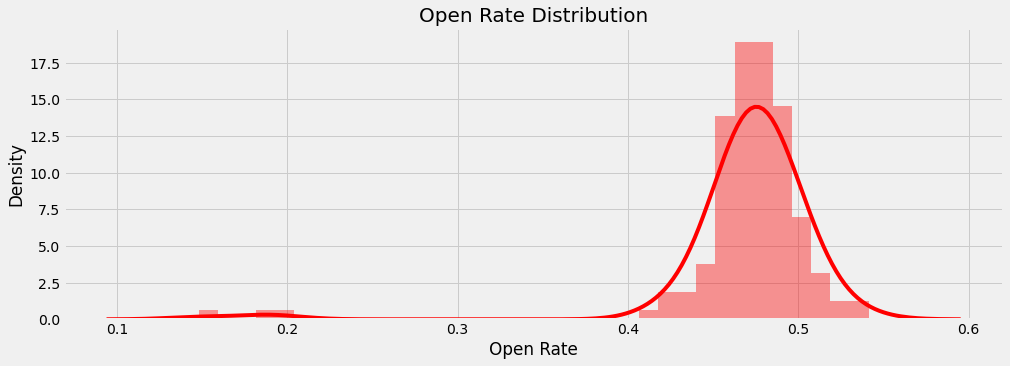

In [45]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.distplot(df['Open Rate'], color = 'red')
plt.title('Open Rate Distribution', fontsize = 20)
plt.show()

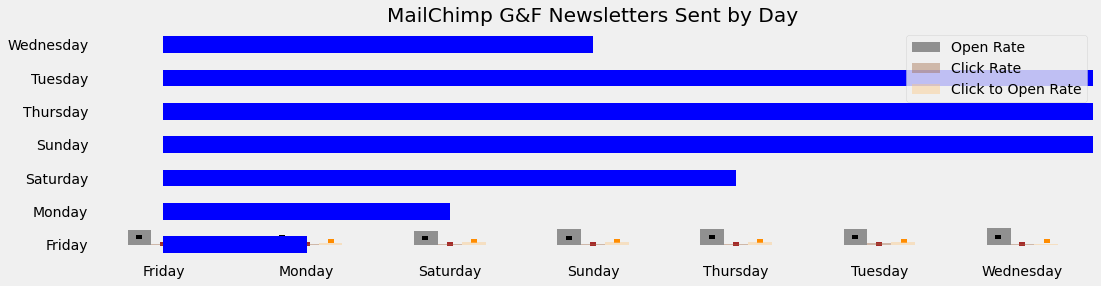

In [46]:
df.groupby('Day of Week')[['Open Rate', 'Click Rate','Click to Open Rate']].agg('mean').plot(
    kind='bar', figsize = (10,6), alpha=0.4, rot=0, cmap='copper');
plt.title("MailChimp G&F Metrics vs. Industry")

#Open Rate Benchmarks:
plt.scatter([-0.17,0.83,1.83,2.83,3.83,4.83,5.83],[0.216,0.22,0.205,0.203,0.217,0.218,0.218], c='black', marker='_');

#Click Rate Benchmarks:
plt.scatter([0,1,2,3,4,5,6], [0.022,0.023,0.021,0.021,0.023,0.024,0.023], c='brown', marker='_');

#Click-to-open Rate Benchmarks:
plt.scatter([0.17,1.17,2.17,3.17,4.17,5.17,6.17], [0.101, 0.106, 0.101, 0.101, 0.107,0.108,0.107], c='darkorange', marker='_');

df.groupby('Day of Week', sort='false')['Send Date'].agg('count').plot(kind='barh', figsize=(16, 4), color = 'blue')
plt.title("MailChimp G&F Newsletters Sent by Day")
plt.ylabel('')
plt.xlabel('')
plt.grid()
plt.show()


In [47]:
df.groupby('Day of Week', sort='false')['Send Date'].agg('count')

Day of Week
Friday        1
Monday        2
Saturday      4
Sunday       44
Thursday     43
Tuesday      44
Wednesday     3
Name: Send Date, dtype: int64

c:\Users\Andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


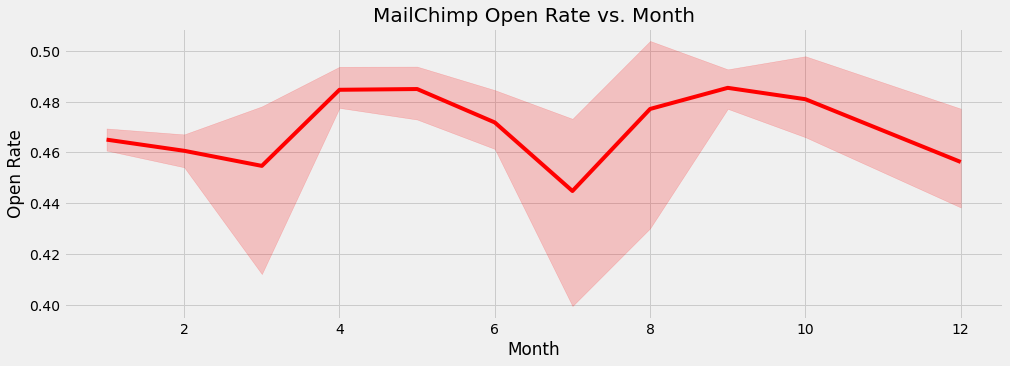

In [48]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.lineplot(df['Month'], df['Open Rate'], color = 'red');
plt.title('MailChimp Open Rate vs. Month', fontsize = 20)
plt.show()

c:\Users\Andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


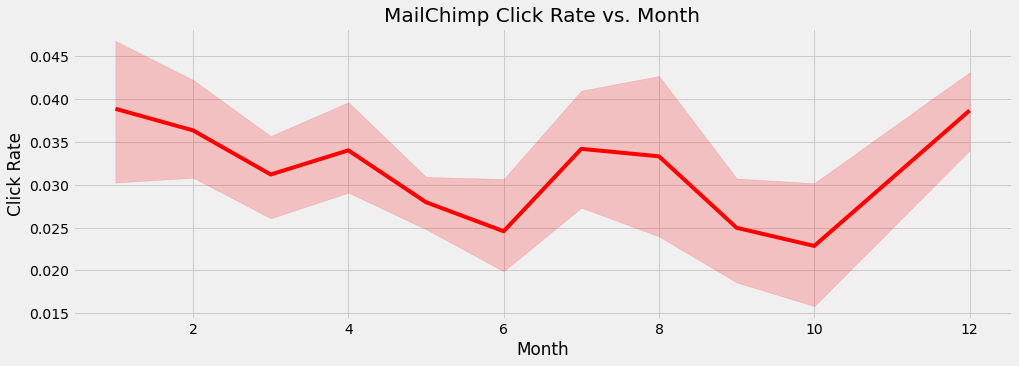

In [49]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.lineplot(df['Month'], df['Click Rate'], color = 'red');
plt.title('MailChimp Click Rate vs. Month', fontsize = 20)
plt.show()

c:\Users\Andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


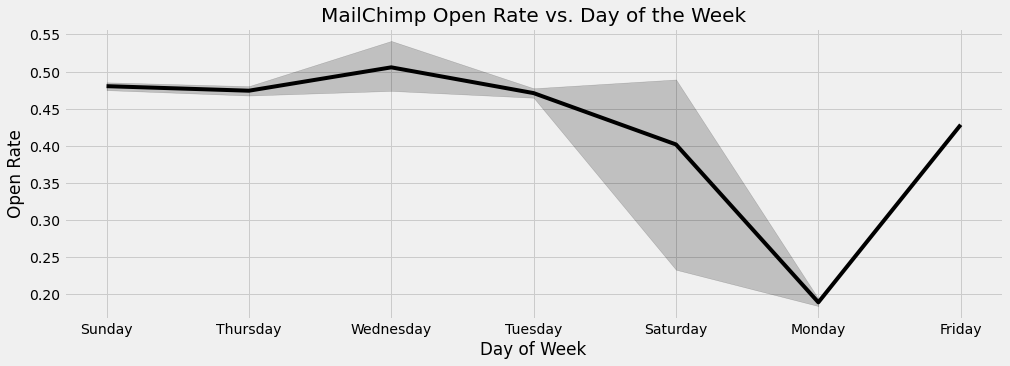

In [50]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.lineplot(df['Day of Week'], df['Open Rate'], color = 'black');
plt.title('MailChimp Open Rate vs. Day of the Week', fontsize = 20)
plt.show()


c:\Users\Andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


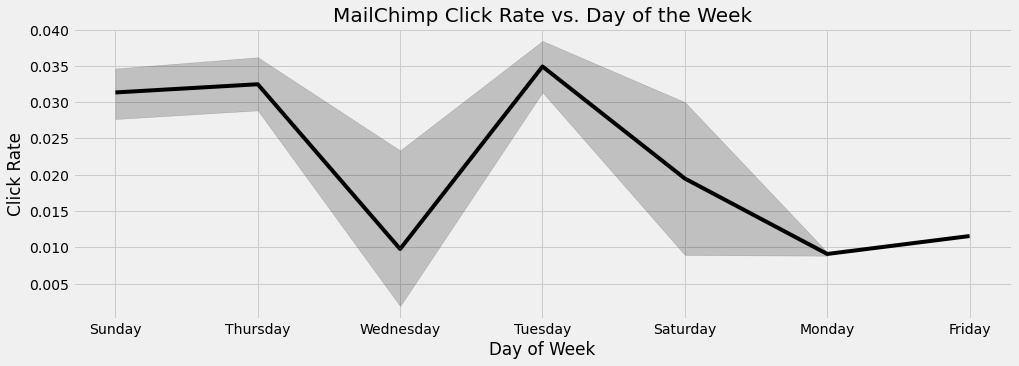

In [51]:

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.lineplot(df['Day of Week'], df['Click Rate'], color = 'black')
plt.title('MailChimp Click Rate vs. Day of the Week', fontsize = 20)
plt.show()

c:\Users\Andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


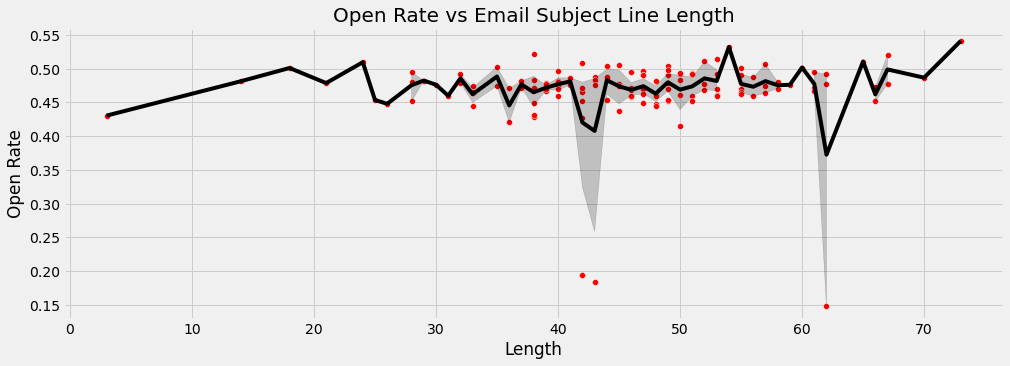

In [52]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.scatterplot(df['Length'], df['Open Rate'], color = 'red')
sns.lineplot(df['Length'], df['Open Rate'], color = 'black')
plt.title('Open Rate vs Email Subject Line Length', fontsize = 20)
plt.show()


In [53]:
df[['Subject','Open Rate', 'Length']].sort_values(['Open Rate'],ascending = False).style.background_gradient(cmap = 'bone')


,Subject,Open Rate,Length
2,Here are the Most Popular G&F Amazon Prime Early Access Deals + New Finds,0.541283,73
63,What current college students want first years to know,0.532207,54
83,Is your teen exhausted and burned out?,0.521693,38
30,Five questions to ask your teen to help them learn to self-advocate,0.520640,67
133,My daughter was rejected by the college of her dreams,0.515204,53
32,7 things NOT to do after college drop off (trust us),0.511120,52
33,10 things to NOT bring to college — according to a college senior,0.510734,65
29,"Parents, don't look away",0.509746,24
28,11 things NOT to do on college move-in day,0.509252,42
19,Things NOT to say when you don’t like your teen’s friends,0.506790,57


c:\Users\Andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


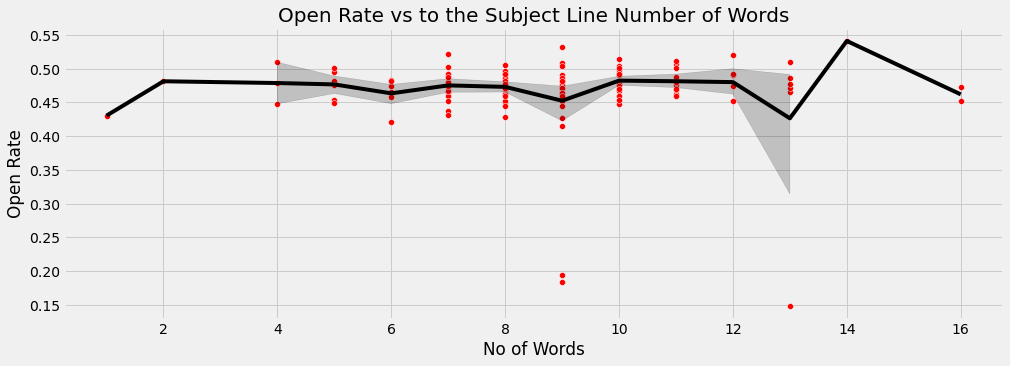

In [54]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.scatterplot(df['No of Words'], df['Open Rate'], color = 'red')
sns.lineplot(df['No of Words'], df['Open Rate'], color = 'black')
plt.title('Open Rate vs to the Subject Line Number of Words', fontsize = 20)
plt.show()

In [55]:
df[['Subject','Open Rate', 'No of Words']].sort_values(['Open Rate'],ascending = False).style.background_gradient(cmap = 'bone')


,Subject,Open Rate,No of Words
2,Here are the Most Popular G&F Amazon Prime Early Access Deals + New Finds,0.541283,14
63,What current college students want first years to know,0.532207,9
83,Is your teen exhausted and burned out?,0.521693,7
30,Five questions to ask your teen to help them learn to self-advocate,0.520640,12
133,My daughter was rejected by the college of her dreams,0.515204,10
32,7 things NOT to do after college drop off (trust us),0.511120,11
33,10 things to NOT bring to college — according to a college senior,0.510734,13
29,"Parents, don't look away",0.509746,4
28,11 things NOT to do on college move-in day,0.509252,9
19,Things NOT to say when you don’t like your teen’s friends,0.506790,11


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Subject)
sum_words = words.sum(axis=0)
words_freq_x = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_x = sorted(words_freq_x, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq_x, columns=['word', 'freq'])
frequency.head(20)

,word,freq
0,college,40
1,things,27
2,teens,25
3,teen,18
4,school,11
5,parenting,9
6,parents,9
7,know,9
8,life,8
9,10,8


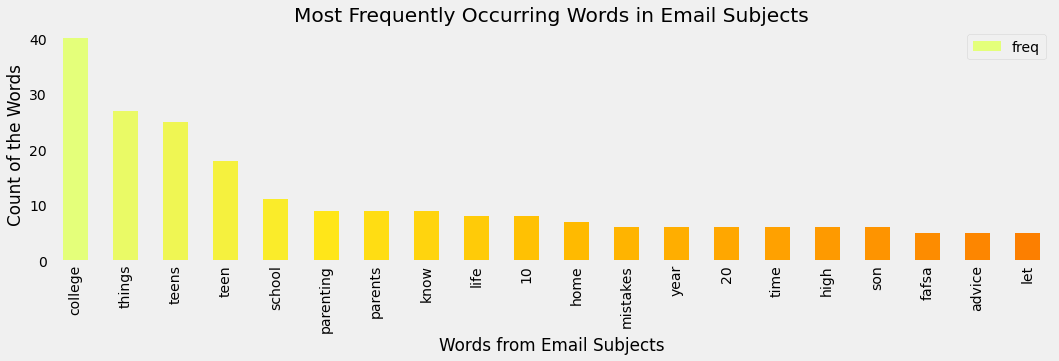

In [57]:
plt.style.use('fivethirtyeight')
color = plt.cm.Wistia(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(16, 4), color = color)
plt.title("Most Frequently Occurring Words in Email Subjects")
plt.ylabel('Count of the Words')
plt.xlabel('Words from Email Subjects')
plt.grid()
plt.show()

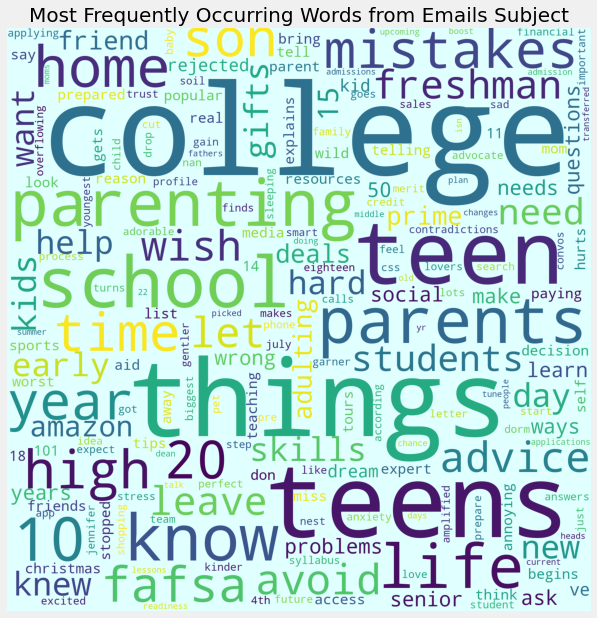

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, 
                      height = 2000).generate_from_frequencies(dict(words_freq_x))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Most Frequently Occurring Words from Emails Subject", fontsize = 20)
plt.show()